In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\alexk\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path,'spi_matches.csv'))

In [4]:
att =pd.read_csv(os.path.join(path,'Attendance soccer.csv'))

In [5]:
df.head()

season        date  league_id                   league             team1  \
0    2016  2016-07-09       7921  FA Women's Super League   Liverpool Women   
1    2016  2016-07-10       7921  FA Women's Super League     Arsenal Women   
2    2016  2016-07-10       7921  FA Women's Super League  Chelsea FC Women   
3    2016  2016-07-16       7921  FA Women's Super League   Liverpool Women   
4    2016  2016-07-17       7921  FA Women's Super League  Chelsea FC Women   

                 team2   spi1   spi2   prob1   prob2  ...  importance1  \
0              Reading  51.56  50.42  0.4389  0.2767  ...          NaN   
1  Notts County Ladies  46.61  54.03  0.3572  0.3608  ...          NaN   
2      Birmingham City  59.85  54.64  0.4799  0.2487  ...          NaN   
3  Notts County Ladies  53.00  52.35  0.4289  0.2699  ...          NaN   
4        Arsenal Women  59.43  60.99  0.4124  0.3157  ...          NaN   

   importance2  score1  score2  xg1  xg2  nsxg1  nsxg2  adj_score1  adj_score2  
0          NaN     2.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN  
1          NaN     2.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN  
2          NaN     1.0     1.0  NaN  NaN    NaN    NaN         NaN         NaN  
3          NaN     0.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN  
4          NaN     1.0     2.0  NaN  NaN    NaN    NaN         NaN         NaN  

[5 rows x 23 columns]

In [6]:
att.head(30)

league  Attendance
0                           Geman Bundesliga       43302
1                    Barclays Premier League       36675
2                   Spanish Primera Division       27381
3   Mexican Primera Division Torneo Clausura       22967
4                              Italy Serie A       22967
5                       Chinese Super League       22594
6                            French League 1       21556
7                        Major League Soccer       21358
8                           Dutch Eredivisie       19154
9                       German 2. Bundesliga       18814
10               English League Championship       18526
11                         Japanese J League       18227
12                        Brasileiro Série A       17402
13                      Scottish Premiership       11697
14                      Russian Premier Liga       11650
15                    Belgian Jupiter League       11551
16                           Portuguese Liga       11000
17             Swiss Raiffeisen Super League       10705
18                       Swedish Allsvenskan        8586
19                  Spanish Segunda Division        7949
20                        English League One        7483
21                            French Ligue 2        7062
22                             Italy Serie B        6708
23                     Norwegian Tippeligaen        6632
24              Austrian T-Mobile Bundesliga        6581
25                         Danish SAS-Ligaen        6391
26         South African ABSA Premier League        6345
27                        English League Two        4630
28                        Greek Super League        3896

In [7]:
df['total_goals'] = df['score1']+df['score2']

In [8]:
df.head()

season        date  league_id                   league             team1  \
0    2016  2016-07-09       7921  FA Women's Super League   Liverpool Women   
1    2016  2016-07-10       7921  FA Women's Super League     Arsenal Women   
2    2016  2016-07-10       7921  FA Women's Super League  Chelsea FC Women   
3    2016  2016-07-16       7921  FA Women's Super League   Liverpool Women   
4    2016  2016-07-17       7921  FA Women's Super League  Chelsea FC Women   

                 team2   spi1   spi2   prob1   prob2  ...  importance2  \
0              Reading  51.56  50.42  0.4389  0.2767  ...          NaN   
1  Notts County Ladies  46.61  54.03  0.3572  0.3608  ...          NaN   
2      Birmingham City  59.85  54.64  0.4799  0.2487  ...          NaN   
3  Notts County Ladies  53.00  52.35  0.4289  0.2699  ...          NaN   
4        Arsenal Women  59.43  60.99  0.4124  0.3157  ...          NaN   

   score1  score2  xg1  xg2  nsxg1  nsxg2  adj_score1  adj_score2  total_goals  
0     2.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN          2.0  
1     2.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN          2.0  
2     1.0     1.0  NaN  NaN    NaN    NaN         NaN         NaN          2.0  
3     0.0     0.0  NaN  NaN    NaN    NaN         NaN         NaN          0.0  
4     1.0     2.0  NaN  NaN    NaN    NaN         NaN         NaN          3.0  

[5 rows x 24 columns]

In [9]:
df_ave = df.groupby('league').agg({'total_goals': ['mean']})

In [10]:
df_ave.head()

total_goals
                                    mean
league                                  
Argentina Primera Division      2.251277
Australian A-League             2.985981
Austrian T-Mobile Bundesliga    3.045872
Barclays Premier League         2.743158
Belgian Jupiler League          2.930288

In [11]:
df_merged = att.merge(df_ave, on = 'league')

C:\Users\alexk\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [12]:
df_merged

league  Attendance  (total_goals, mean)
0                    Barclays Premier League       36675             2.743158
1                   Spanish Primera Division       27381             2.642105
2   Mexican Primera Division Torneo Clausura       22967             2.580263
3                              Italy Serie A       22967             2.880526
4                       Chinese Super League       22594             3.203252
5                        Major League Soccer       21358             2.996931
6                           Dutch Eredivisie       19154             3.179130
7                       German 2. Bundesliga       18814             2.888889
8                English League Championship       18526             2.538392
9                          Japanese J League       18227             2.686404
10                        Brasileiro Série A       17402             2.348684
11                      Scottish Premiership       11697             2.569428
12                      Russian Premier Liga       11650             2.392670
13                           Portuguese Liga       11000             2.576797
14             Swiss Raiffeisen Super League       10705             2.981919
15                       Swedish Allsvenskan        8586             2.736585
16                  Spanish Segunda Division        7949             2.203344
17                        English League One        7483             2.631752
18                            French Ligue 2        7062             2.392530
19                             Italy Serie B        6708             2.510306
20                     Norwegian Tippeligaen        6632             2.930964
21              Austrian T-Mobile Bundesliga        6581             3.045872
22                         Danish SAS-Ligaen        6391             2.823009
23         South African ABSA Premier League        6345             2.223005
24                        English League Two        4630             2.473684
25                        Greek Super League        3896             2.320833

In [13]:
df.corr

<bound method DataFrame.corr of        season        date  league_id                   league  \
0        2016  2016-07-09       7921  FA Women's Super League   
1        2016  2016-07-10       7921  FA Women's Super League   
2        2016  2016-07-10       7921  FA Women's Super League   
3        2016  2016-07-16       7921  FA Women's Super League   
4        2016  2016-07-17       7921  FA Women's Super League   
...       ...         ...        ...                      ...   
45104    2021  2021-12-12       1859    Norwegian Tippeligaen   
45105    2021  2021-12-12       1859    Norwegian Tippeligaen   
45106    2021  2021-12-12       1859    Norwegian Tippeligaen   
45107    2021  2021-12-12       1859    Norwegian Tippeligaen   
45108    2021  2021-12-12       1859    Norwegian Tippeligaen   

                  team1                team2   spi1   spi2   prob1   prob2  \
0       Liverpool Women              Reading  51.56  50.42  0.4389  0.2767   
1         Arsenal Women  Notts 

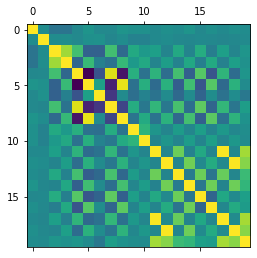

In [14]:
#3 Create a correlation matrix heatmap (colored).

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

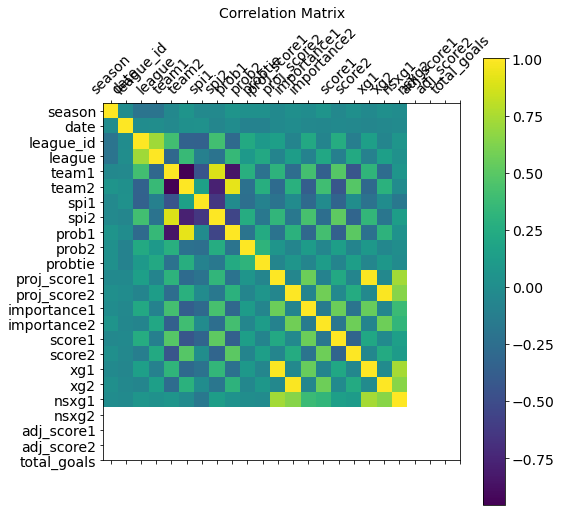

In [15]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Yellow squares indicate a strong positive relationship, while dark blue squares a strong negative one.
Light blue or green squares show a very weak relationship.

In [16]:
df_merged.head()

league  Attendance  (total_goals, mean)
0                   Barclays Premier League       36675             2.743158
1                  Spanish Primera Division       27381             2.642105
2  Mexican Primera Division Torneo Clausura       22967             2.580263
3                             Italy Serie A       22967             2.880526
4                      Chinese Super League       22594             3.203252

In [30]:
df_merged['ave_goals']=df_merged['total_goals', 'mean']

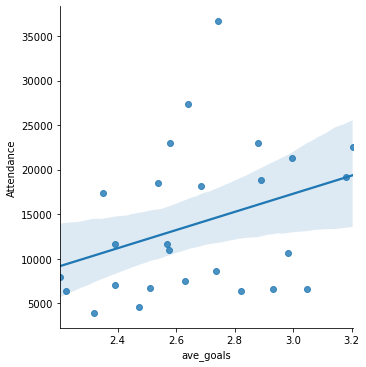

In [32]:
#3 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
sns.lmplot(y = 'Attendance', x = ('ave_goals'), data = df_merged)

This shows that leagues with a higher number of goals scored tend to enjoy higher attendance

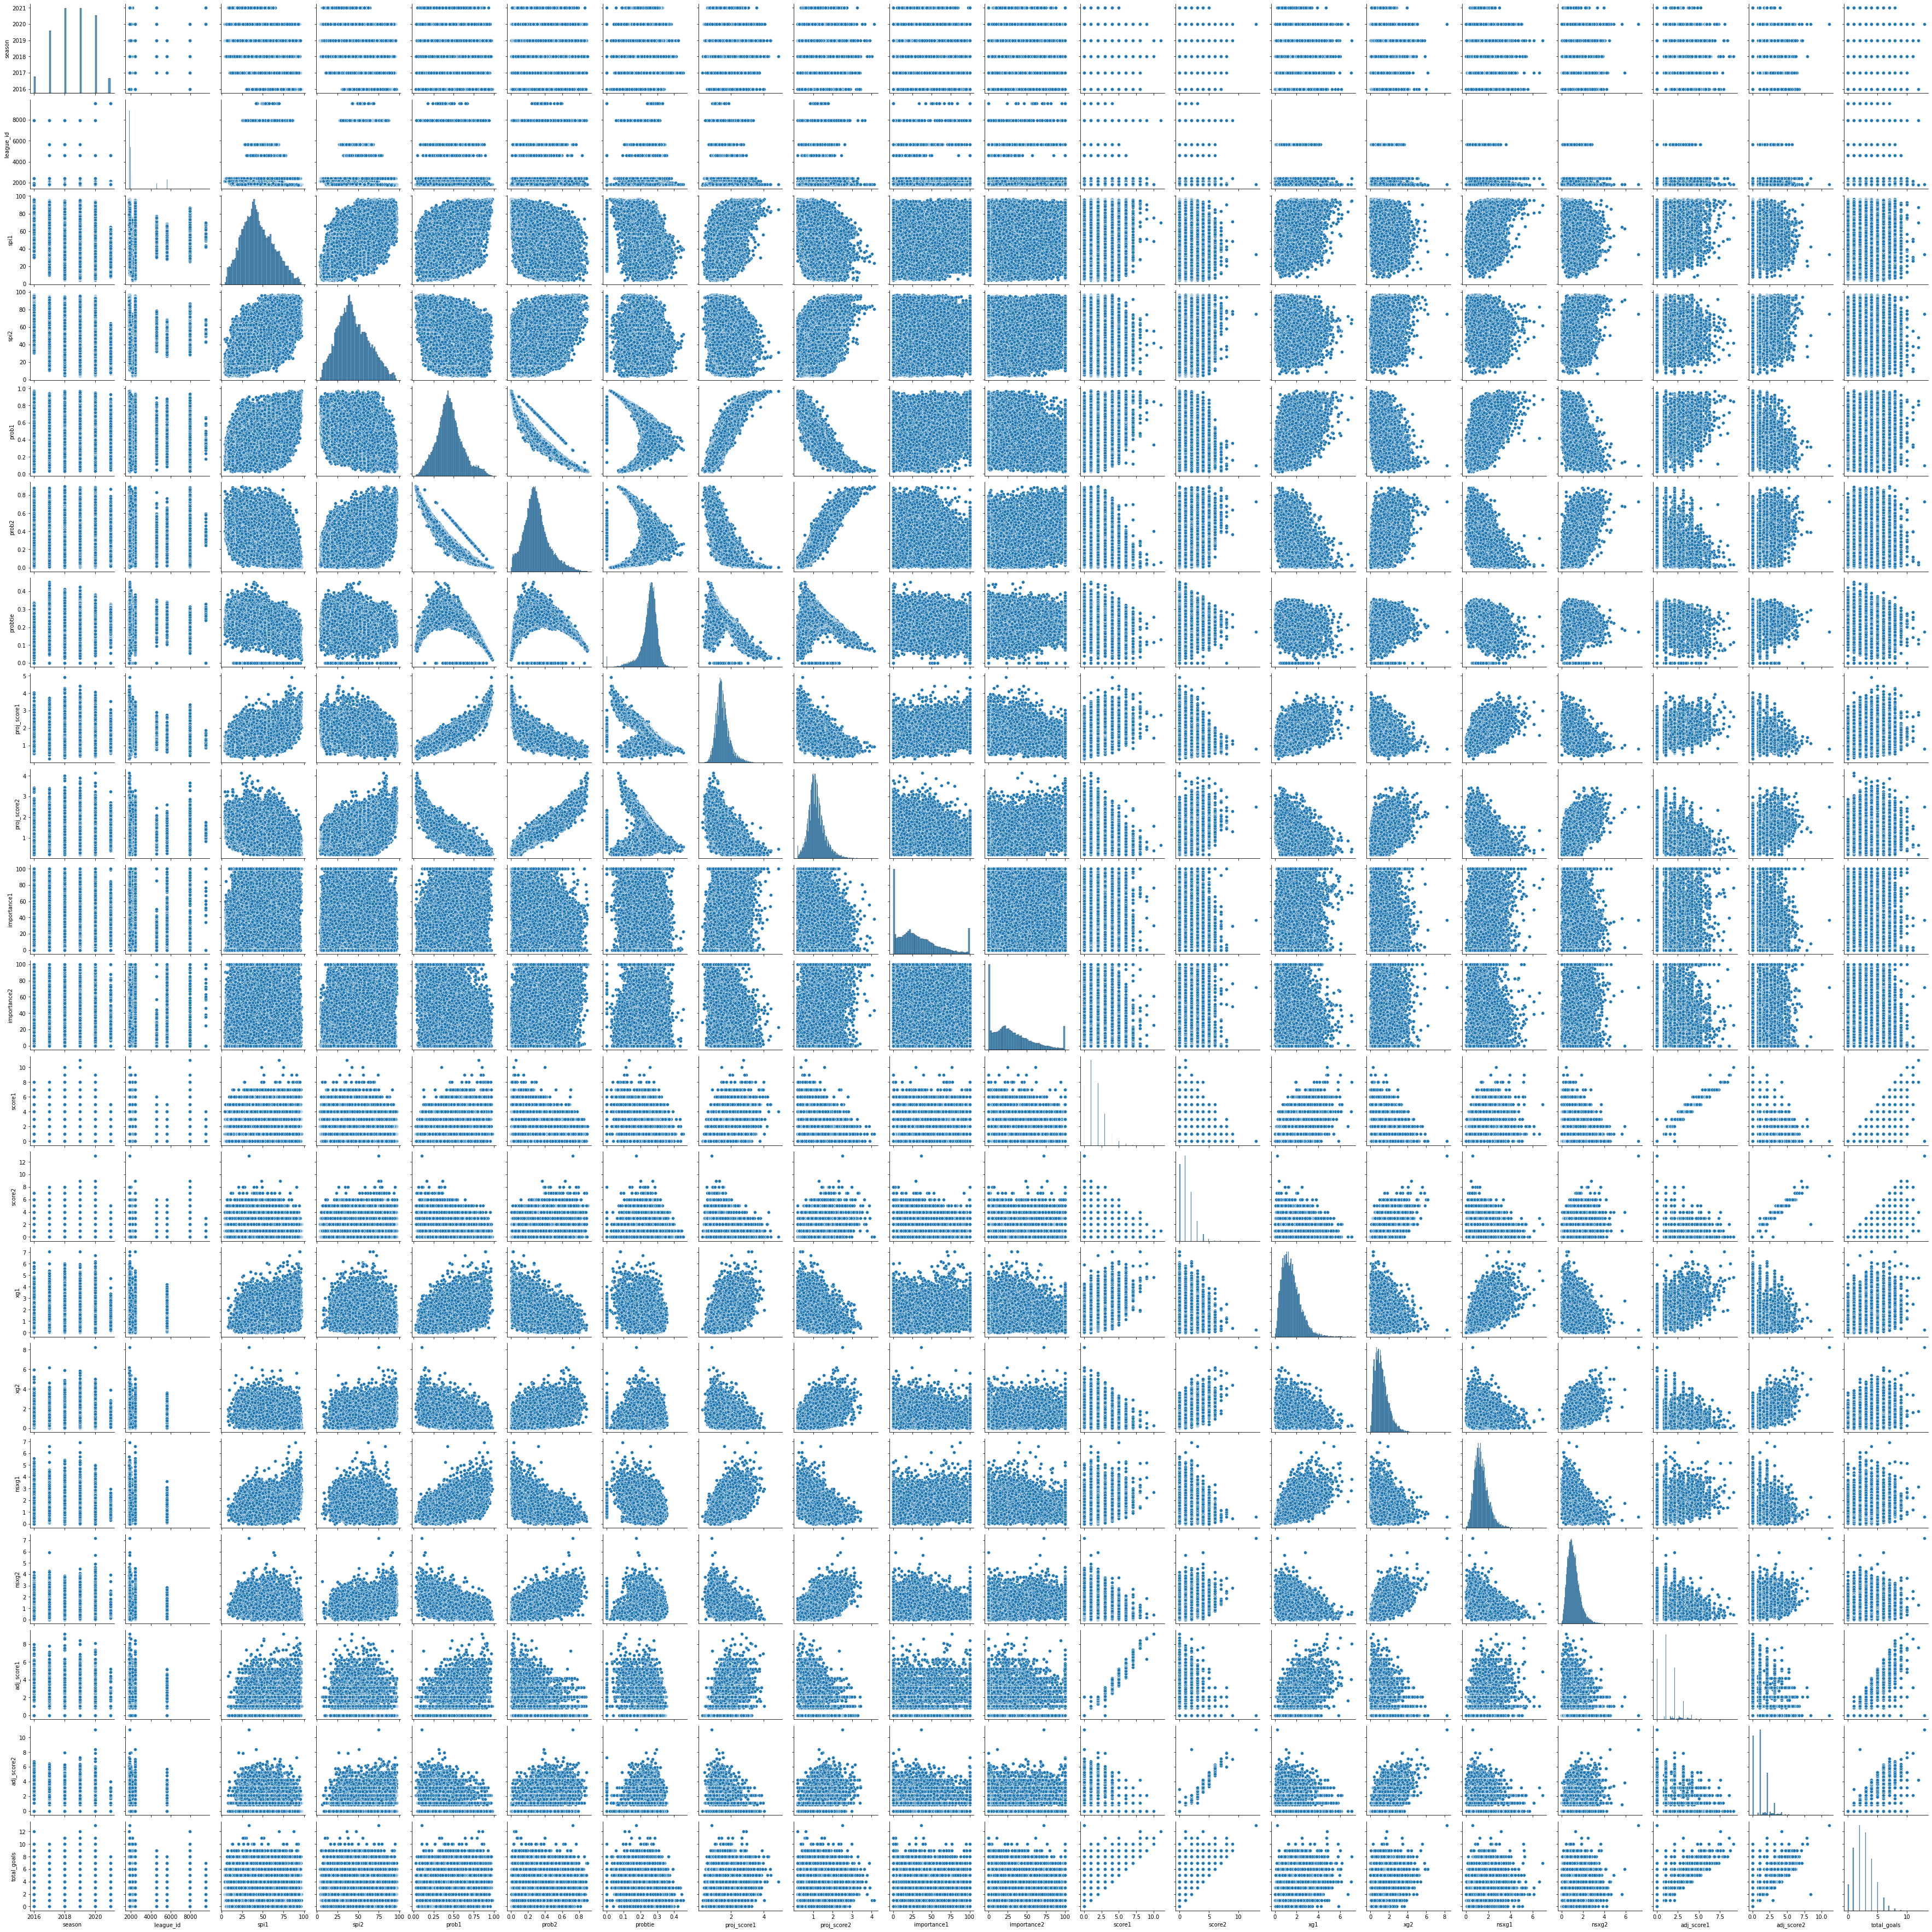

In [33]:
#5 Create a pair plot of the entire data set.
g = sns.pairplot(df)

C:\Users\alexk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_goals', ylabel='Density'>

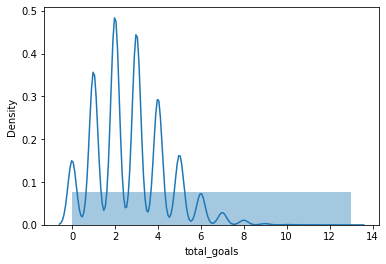

In [34]:
#6 Create a categorical plot and interpret the results\
sns.distplot(df['total_goals'], bins = 1)

In [35]:
df.loc[df['total_goals'] < 2, 'goals category'] = 'low scoring'

In [40]:
df.loc[(df['total_goals'] >= 2) & (df[''] < 5), 'goals category'] = 'average scoring'

In [41]:
df.loc[df['total_goals'] >= 5, 'goals category'] = 'high scoring'

In [42]:
df['goals category'].value_counts(dropna = False)

average scoring    26155
low scoring        10818
high scoring        5972
NaN                 2164
Name: goals category, dtype: int64

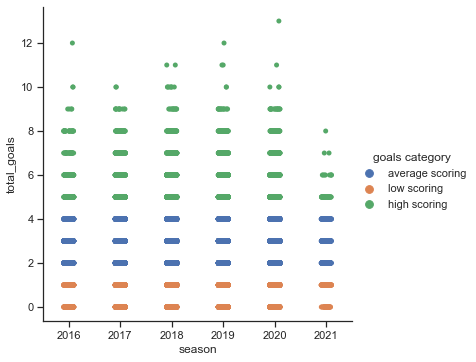

In [44]:
sns.set(style="ticks")
g = sns.catplot(x="season", y="total_goals", hue="goals category", data=df)

This shows that the number of goals scored during a came has been increasing for the past couple of yeaars.

In [45]:
#7 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Has the number of goals per game changed over time?
Yes, it seems to have consistently increased over the past 5 years 

Does higher number of goals scored lead to higher attendance? 
Yes higher total number of goals corellates with higher total attendance

In [46]:
#8 Define any hypotheses that you can at this point. You’ll be testing these later on.

Having a higher number of goals per game leads to increased popularity of soccer and higher attendance

In [49]:
df.to_csv(os.path.join(path, 'soccer.csv'))

In [51]:
att.to_csv(os.path.join(path, 'att.csv'))

In [52]:
df_merged.to_csv(os.path.join(path, 'merged.csv'))